<h1> <b>Correlation의 크기를 활용한 잔여수명 예측 가능 여부 판단 (2)</b></h1>
&nbsp;

- <h3> <b>데이터 : <a href="https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/">[Turbofan Engine Degradation Simulation Data Set]</a></b></h3>

     - <h4> <b>train data : Run-to-Failure data</b> </h4>
     - <h4> <b>test data : Censored data</b> </h4>
     - <h4> <b>train correlation : Correlation L2-Norm of Run-to-Failure data</b> </h4>
     - <h4> <b>test correlation : Correlation L2-Norm of Censored data</b> </h4>
  
  
  

- <h3> <b>Correlation 값의 크기를 Degradation 값으로 사용</b> </h3>
- <h3> <b>잔여수명 예측 : PoF (Physics of Failure) 기반 잔여수명 예측을 목표로 함</b> </h3>

In [251]:
# 개인 함수 불러오기
src_dir = 'E:\\R\\prototype5\\function\\'
src_file = list.files(src_dir)
for(i in 1:length(src_file)) source(paste(src_dir, src_file[i], sep=''), encoding='utf-8')

In [51]:
# data import
# Train Dataset 
trainData = read.table('E:\\데이터\\예지보전\\CMAPSSData\\train_FD001.txt')
# testDataset 
testData = read.table('E:\\데이터\\예지보전\\CMAPSSData\\test_FD001.txt')

# column name 정의
colname = c()
for(i in 0:25){
  colname = append(colname, paste0('Section-',i))
}
colnames(trainData) = colname
colnames(testData) = colname

In [52]:
# 데이터 요약
summary(trainData)

   Section-0        Section-1       Section-2           Section-3         
 Min.   :  1.00   Min.   :  1.0   Min.   :-8.70e-03   Min.   :-6.000e-04  
 1st Qu.: 26.00   1st Qu.: 52.0   1st Qu.:-1.50e-03   1st Qu.:-2.000e-04  
 Median : 52.00   Median :104.0   Median : 0.00e+00   Median : 0.000e+00  
 Mean   : 51.51   Mean   :108.8   Mean   :-8.87e-06   Mean   : 2.351e-06  
 3rd Qu.: 77.00   3rd Qu.:156.0   3rd Qu.: 1.50e-03   3rd Qu.: 3.000e-04  
 Max.   :100.00   Max.   :362.0   Max.   : 8.70e-03   Max.   : 6.000e-04  
   Section-4     Section-5       Section-6       Section-7      Section-8   
 Min.   :100   Min.   :518.7   Min.   :641.2   Min.   :1571   Min.   :1382  
 1st Qu.:100   1st Qu.:518.7   1st Qu.:642.3   1st Qu.:1586   1st Qu.:1402  
 Median :100   Median :518.7   Median :642.6   Median :1590   Median :1408  
 Mean   :100   Mean   :518.7   Mean   :642.7   Mean   :1591   Mean   :1409  
 3rd Qu.:100   3rd Qu.:518.7   3rd Qu.:643.0   3rd Qu.:1594   3rd Qu.:1415  
 Max.   :100 

In [53]:
# 변수 별 분산
apply(trainData, 2, var)

Section-0    Section-1    Section-2    Section-3    Section-4    Section-5 
8.542545e+02 4.744591e+03 4.784340e-06 8.588541e-08 0.000000e+00 0.000000e+00 
   Section-6    Section-7    Section-8    Section-9   Section-10   Section-11 
2.500533e-01 3.759099e+01 8.101089e+01 0.000000e+00 1.929279e-06 7.833883e-01 
  Section-12   Section-13   Section-14   Section-15   Section-16   Section-17 
5.038938e-03 4.876536e+02 0.000000e+00 7.133568e-02 5.439850e-01 5.172330e-03 
  Section-18   Section-19   Section-20   Section-21   Section-22   Section-23 
3.639005e+02 1.406628e-03 0.000000e+00 2.398667e+00 0.000000e+00 0.000000e+00 
  Section-24   Section-25 
3.266927e-02 1.171825e-02

In [54]:
# 분산이 0인 변수 및 불필요 변수 제거
train = trainData[,-c(which(apply(trainData, 2, var) == 0), 2,11)] 
test = testData[,-c(which(apply(trainData, 2, var) == 0), 2, 11)] 

In [55]:
head(train)

Section-0,Section-2,Section-3,Section-6,Section-7,Section-8,Section-11,Section-12,Section-13,Section-15,Section-16,Section-17,Section-18,Section-19,Section-21,Section-24,Section-25
1,-0.0007,-4e-04,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,0.0019,-3e-04,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
1,-0.0043,3e-04,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
1,0.0007,0e+00,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
1,-0.0019,-2e-04,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
1,-0.0043,-1e-04,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8132.85,8.4108,391,38.98,23.3669


In [56]:
head(test)

Section-0,Section-2,Section-3,Section-6,Section-7,Section-8,Section-11,Section-12,Section-13,Section-15,Section-16,Section-17,Section-18,Section-19,Section-21,Section-24,Section-25
1,0.0023,3e-04,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,-0.0027,-3e-04,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
1,0.0003,1e-04,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
1,0.0042,0e+00,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
1,0.0014,0e+00,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130
1,0.0012,3e-04,642.11,1579.12,1395.13,554.22,2388.00,9050.96,47.26,521.92,2388.08,8127.46,8.4238,392,38.91,23.3467


  [1] 192 287 179 189 269 188 259 150 201 222 240 170 163 180 207 209 276 195
 [19] 158 234 195 202 168 147 230 199 156 165 163 194 234 191 200 195 181 158
 [37] 170 194 128 188 216 196 207 192 158 256 214 231 215 198 213 213 195 257
 [55] 193 275 137 147 231 172 185 180 174 283 153 202 313 199 362 137 208 213
 [73] 213 166 229 210 154 231 199 185 240 214 293 267 188 278 178 213 217 154
 [91] 135 341 155 258 283 336 202 156 185 200


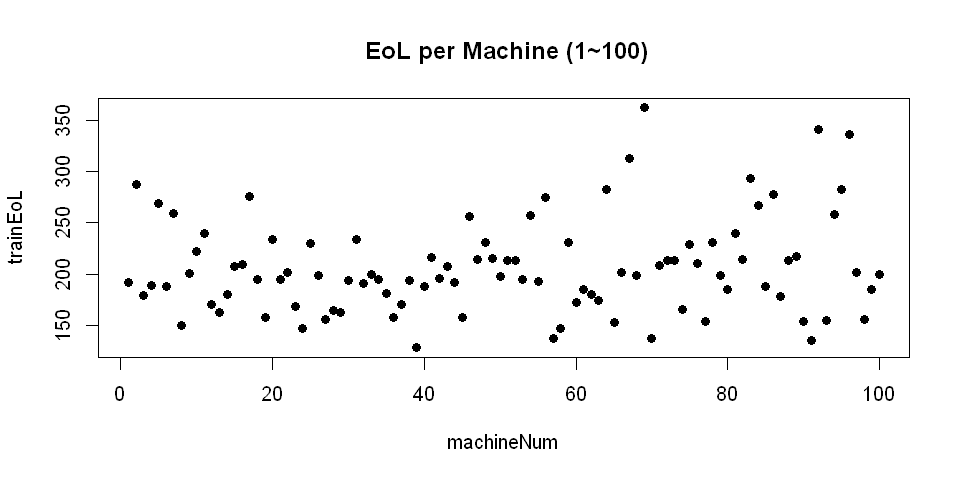

In [57]:
# Machine Number
machineNum = as.numeric(names(table(train$'Section-0')))
# EoL (End of Life)
trainEoL = as.numeric(table(train$'Section-0'))
testEoL = read.table('E:\\데이터\\예지보전\\CMAPSSData\\EoL_FD001.txt')
testEoL = testEoL$V1

# library(repr)
options(repr.plot.width = 8, repr.plot.height = 4)
plot(machineNum, trainEoL, pch=16, main = ' EoL per Machine (1~100)')
print(trainEoL)

In [58]:
# Machine 별로 데이터 보기 & 모델링을 위해 머신 정보 제거
machineNum = 1
trainM =train[train$`Section-0`== machineNum, -1]
testM =test[test$`Section-0`== machineNum, -1] 

In [59]:
head(trainM)

Section-2,Section-3,Section-6,Section-7,Section-8,Section-11,Section-12,Section-13,Section-15,Section-16,Section-17,Section-18,Section-19,Section-21,Section-24,Section-25
-0.0007,-4e-04,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
0.0019,-3e-04,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
-0.0043,3e-04,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
0.0007,0e+00,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
-0.0019,-2e-04,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
-0.0043,-1e-04,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8132.85,8.4108,391,38.98,23.3669


In [60]:
head(testM )

Section-2,Section-3,Section-6,Section-7,Section-8,Section-11,Section-12,Section-13,Section-15,Section-16,Section-17,Section-18,Section-19,Section-21,Section-24,Section-25
0.0023,3e-04,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
-0.0027,-3e-04,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
0.0003,1e-04,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
0.0042,0e+00,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
0.0014,0e+00,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130
0.0012,3e-04,642.11,1579.12,1395.13,554.22,2388.00,9050.96,47.26,521.92,2388.08,8127.46,8.4238,392,38.91,23.3467


<h2><b> Correlation Extraction per machine</b></h2>

In [154]:
## Machine 별로 Correlation의 크기 추출 

# correlation L2-norm
trainCorL2normVec = c()
testCorL2normVec = c()

# Cycle
trainCycle = c()
testCycle = c()

# Machine number
trainMachineNum = c()
testMachineNum = c()

for(machineNum in 1:100){
    trainM =train[train$`Section-0`== machineNum, -1]
    testM =test[test$`Section-0`== machineNum, -1] 
    
    # 10:nrow(trainM): 데이터 수가 적을경우 x-mean(x) 가 0이되면 분모에 0이 들어가면서 상관계수가 계산되지 않는 문제 발생 
    # 관측치의 개수를 적절하게 넣어 Zero Division 문제 해결
    
    for(i in 10:nrow(trainM)){
        trainCorr = cor(trainM[1:i,-1])
        trainCorL2norm = sum(sqrt(trainCorr^2)) - sum(sqrt(diag(trainCorr^2)))
        trainCorL2normVec = append(trainCorL2normVec, trainCorL2norm) # correlation L2-norm
        trainCycle = append(trainCycle, i)
        trainMachineNum = append(trainMachineNum, machineNum)
    }
    for(i in 10:nrow(testM)){
        testCorr = cor(testM[1:i,-1]) 
        testCorL2norm = sum(sqrt(testCorr^2)) - sum(sqrt(diag(testCorr^2)))
        testCorL2normVec = append(testCorL2normVec, testCorL2norm) # correlation L2-norm
        testCycle = append(testCycle, i)
        testMachineNum = append(testMachineNum, machineNum)
    }
}

trainCor = cbind(trainMachineNum, trainCycle, trainCorL2normVec)
testCor = cbind(testMachineNum, testCycle, testCorL2normVec)

colnames(trainCor) = c('Machine', 'Cycle', 'Correlation')
colnames(testCor) = c('Machine', 'Cycle', 'Correlation')

trainCor = as.data.frame(trainCor)
testCor = as.data.frame(testCor)

In [155]:
cat("train NA 개수 : ", sum(is.na(trainCor)))
cat("\ntest NA 개수 : ", sum(is.na(testCor)))

train NA 개수 :  0
test NA 개수 :  0

In [156]:
head(trainCor)

Machine,Cycle,Correlation
1,10,56.06553
1,11,53.60933
1,12,52.05780
1,13,51.75157
1,14,49.26994
1,15,47.84803


In [157]:
head(testCor)

Machine,Cycle,Correlation
1,10,63.97364
1,11,60.35814
1,12,57.36526
1,13,55.24741
1,14,51.42315
1,15,47.65092


<h2><b> PoF Extraction</b></h2>

In [207]:
PoFList = c()
for(machineNum in 1:100){
    trainMCor = trainCor$Correlation[trainCor$Machine==machineNum] # machine 별 correlation
    PoF = trainMCor[length(trainMCor)] # PoF 
    PoFList = append(PoFList, PoF)   
}

In [321]:
print(PoFList)

  [1] 122.70221 142.89365 126.24609 115.30474 141.72869 112.43944 112.40111
  [8]  86.29081 127.20889 141.62581 131.83365  90.81171 107.17803 111.98295
 [15] 139.30167  86.23987 134.54829 128.73693  95.99664 105.66792 103.68059
 [22]  86.56139  98.96481 135.13264 107.84900  90.25106 119.97072 136.33074
 [29] 118.86947 136.25129 129.36359 113.32273 125.93097 112.21576 130.89502
 [36] 102.41654 110.52791 100.01259 109.05449 103.79340 133.45031 102.92114
 [43] 135.93079 123.80065 133.96342 128.11006 141.06509 123.15864 113.33805
 [50] 128.91981 123.58712 120.58877 124.37370 139.29038  97.37715  97.94764
 [57] 128.32303 126.74957 118.82919 118.25236 143.32760 105.58937 111.31213
 [64] 128.19850 138.47782 102.87178 107.68224 112.41153 112.03314 129.69296
 [71] 100.05536 129.01688  91.78720 129.86123 111.71842  91.28121 114.02590
 [78] 140.96524 141.25470  92.84734 101.83873 135.35179 129.33249 104.18122
 [85] 101.55488 116.25010 120.31751 131.25193 134.40930 134.39478 102.30249
 [92] 127.79

In [214]:
sprintf("PoF 평균 : %f", mean(PoFList))
sprintf("PoF 표준편차 : %f", sd(trainEoL))

[1] "PoF 평균 : 117.843357"

[1] "PoF 표준편차 : 46.342749"

<h2><b> EoL Extraction</b></h2>

In [170]:
testRUL = read.table('E:\\데이터\\예지보전\\CMAPSSData\\RUL_FD001.txt')
testRUL = testRUL$V1

In [185]:
# EoL Extraction
trainEoL = c() # EoL of train data
testK = c() # current time of test data
for(machineNum in 1:100){
    trainEoL = append(trainEoL, nrow(trainData[trainData$'Section-0'==machineNum,]))
    testK = append(testK, nrow(testData[testData$'Section-0'==machineNum,]))        
}
testEoL = testK + testRUL

print('train EoL')
print(trainEoL)
cat('\n')
print('test EoL')
print(testEoL)

[1] "train EoL"
  [1] 192 287 179 189 269 188 259 150 201 222 240 170 163 180 207 209 276 195
 [19] 158 234 195 202 168 147 230 199 156 165 163 194 234 191 200 195 181 158
 [37] 170 194 128 188 216 196 207 192 158 256 214 231 215 198 213 213 195 257
 [55] 193 275 137 147 231 172 185 180 174 283 153 202 313 199 362 137 208 213
 [73] 213 166 229 210 154 231 199 185 240 214 293 267 188 278 178 213 217 154
 [91] 135 341 155 258 283 336 202 156 185 200

[1] "test EoL"
  [1] 143 147 195 188 189 198 251 261 166 288 180 341 290 153 159 197 215 161
 [19] 222 200 205 150 243 206 193 195 206 255 261 258 204 193 156 210 209 145
 [37] 142 175 179 161 141 166 231 163 266 193 208 170 324 153 258 218 190 218
 [55] 250 151 263 213 208 247 180 286 227 196 199 161 148 195 175 246 186 181
 [73] 243 263 201 215 196 179 164 223 221 171 210 230 152 199 172 183 313 174
 [91] 272 170 329 188 217 234 216 180 214 218


In [188]:
sprintf("Train EoL 평균 : %f", mean(trainEoL))
sprintf("Test EoL 평균 : %f", mean(testEoL))

sprintf("Train EoL 표준편차 : %f", sd(trainEoL))
sprintf("Test EoL 표준편차 : %f", sd(testEoL))

[1] "Train EoL 평균 : 206.310000"

[1] "Test EoL 평균 : 206.480000"

[1] "Train EoL 표준편차 : 46.342749"

[1] "Test EoL 표준편차 : 44.041872"

In [242]:
machineNum=91
ucl = mean(PoFList)+3*sd(PoFList)
lcl = mean(PoFList)-3*sd(PoFList)

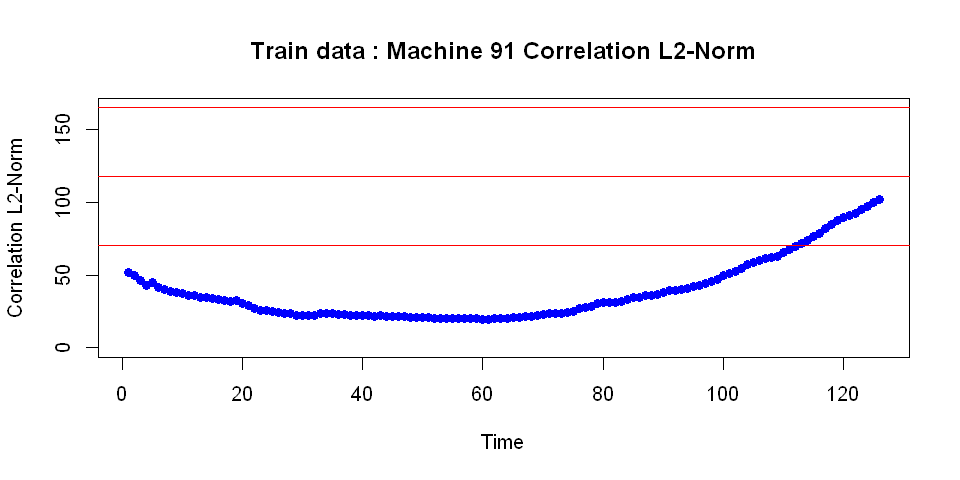

In [243]:
# visualization of train data
par(mfrow=c(1,1))
options(repr.plot.width = 8, repr.plot.height = 4)
plot(trainCor$Correlation[trainCor$Machine==machineNum], pch=16, xlab='Time', ylab='Correlation L2-Norm', main=paste0('Train data : Machine ', machineNum, ' Correlation L2-Norm'), col='blue', ylim=c(0,ucl))
abline(h=mean(PoFList), col='red')
abline(h=ucl, col='red')
abline(h=lcl, col='red')

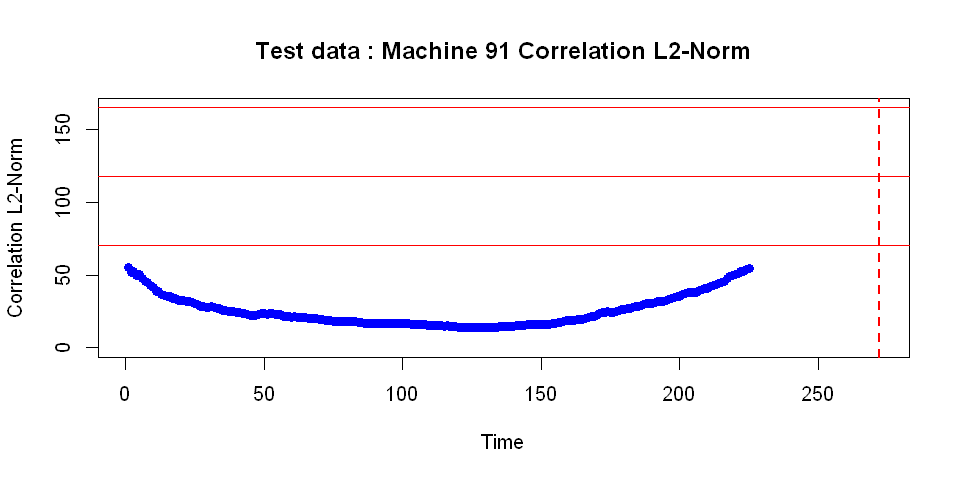

In [244]:
par(mfrow=c(1,1))
options(repr.plot.width = 8, repr.plot.height = 4)
plot(testCor$Correlation[testCor$Machine==machineNum], pch=16, xlab='Time', ylab='Correlation L2-Norm', main=paste0('Test data : Machine ', machineNum, ' Correlation L2-Norm'), col='blue', xlim = c(1, testEoL[machineNum]), ylim=c(0,ucl))
abline(h=mean(PoFList), col='red')
abline(h=ucl, col='red')
abline(h=lcl, col='red')
abline(v=testEoL[machineNum], col='red', lwd=2, lty=2) # test EoL

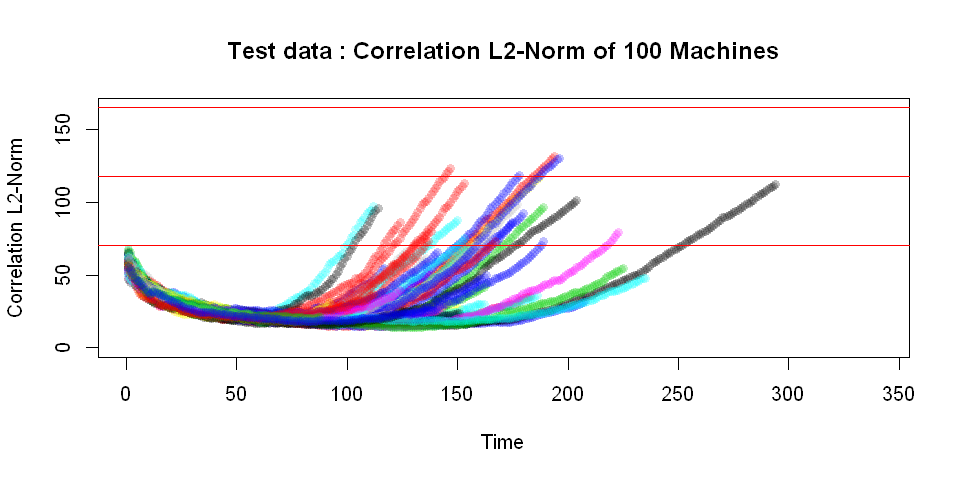

In [303]:
plot(testCor$Correlation[testCor$Machine==1], pch=16, xlab='Time', ylab='Correlation L2-Norm', main=paste0('Test data : Correlation L2-Norm of 100 Machines'), col='blue', xlim = c(1, max(testEoL)), ylim=c(0,ucl))
for(machineNum in 2:100){
    points(testCor$'Correlation'[testCor$'Machine'== machineNum], pch=16, col=adjustcolor(machineNum, alpha=0.25))
}
abline(h=mean(PoFList), col='red')
abline(h=ucl, col='red')
abline(h=lcl, col='red')

<h2><b>RUL Prediction : Exponentially Weightd Regression</b></h2>

- <h3><b>Linear Regression</b></h3>
    
- <h3><b>Polynomial Regression</b></h3>
    
- <h3><b>Exponential Regression</b></h3>

In [312]:
# RUL prediction model setting
trainX = as.matrix(50:100)
trainY = as.matrix(trainCor$'Correlation'[trainCor$'Machine'==machineNum][50:100])
testX = as.matrix(1:length(testCor$'Correlation'[testCor$'Machine'==machineNum]))
testY = as.matrix(testCor$'Correlation'[testCor$'Machine'==machineNum])
PoF = mean(PoF)
w = exponential_weight(1:nrow(testY),testY, alpha=0.05)

<h3><b>Expoinentially Weighted Linear Regression</b></h3>

--------------------
information of RUL

current time: 189
predict time: 240.925
RUL: 51.925
--------------------

Test EoL : 218

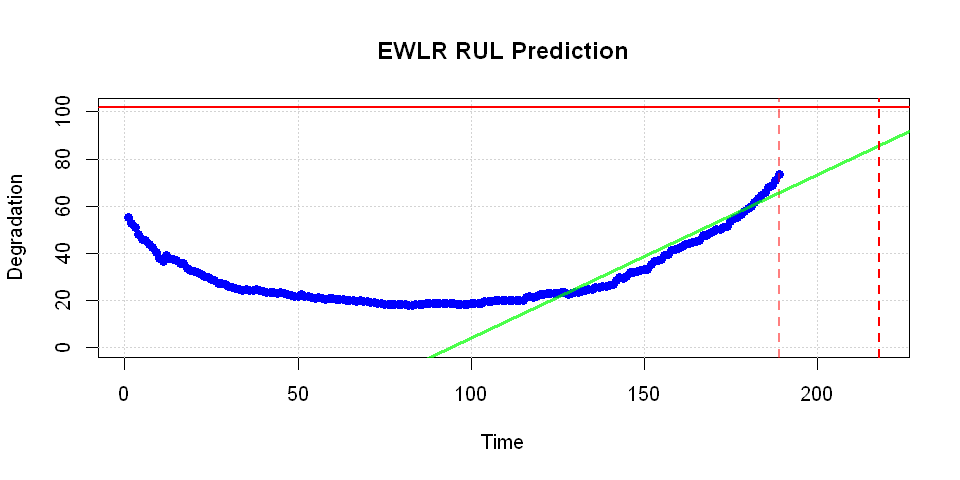

In [317]:
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow=c(1,1))

RS = RULsystem(trainX, trainY, testX, testY, time=c(nrow(testY),nrow(testY)), weight=w, mean_life=mean(trainEoL), alpha=0.05, failure_criteria = PoF, model='WLR', plot_type=T, ylim=c(0,PoF), xlim=c(1,testEoL[machineNum]))
abline(v=testEoL[machineNum], col='red', lwd=2, lty=2) # test EoL
title(main= "EWLR RUL Prediction") # Exponentially Weighted Linear Regression
cat(sprintf('Test EoL : %d', testEoL[machineNum]))

<h3><b>Expoinentially Weighted Polynomial Regression</b></h3>

Warning message in WPR_model(test_x, test_y, time, weight, failure_criteria):
"강제형변환중에 허수부분이 버려졌습니다"

--------------------
information of RUL

current time: 189
predict time: 212.067
RUL: 23.067
--------------------

Test EoL : 218

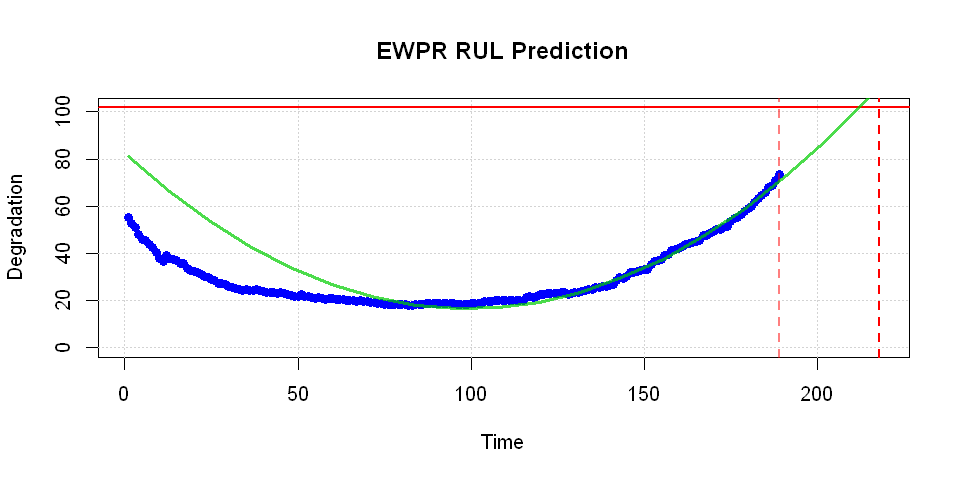

In [318]:
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow=c(1,1))

RS = RULsystem(trainX, trainY, testX, testY, time=c(nrow(testY),nrow(testY)), weight=w, mean_life=mean(trainEoL), alpha=0.05, failure_criteria = PoF, model='WPR', plot_type=T, ylim=c(0,PoF), xlim=c(1,testEoL[machineNum]))
abline(v=testEoL[machineNum], col='red', lwd=2, lty=2) # test EoL
title(main= "EWPR RUL Prediction") # Exponentially Weighted Polynomial Regression
cat(sprintf('Test EoL : %d', testEoL[machineNum]))

<h3><b>Expoinentially Weighted Exponential Regression</b></h3>

--------------------
information of RUL

current time: 189
predict time: 213.429
RUL: 24.429
--------------------

Test EoL : 218

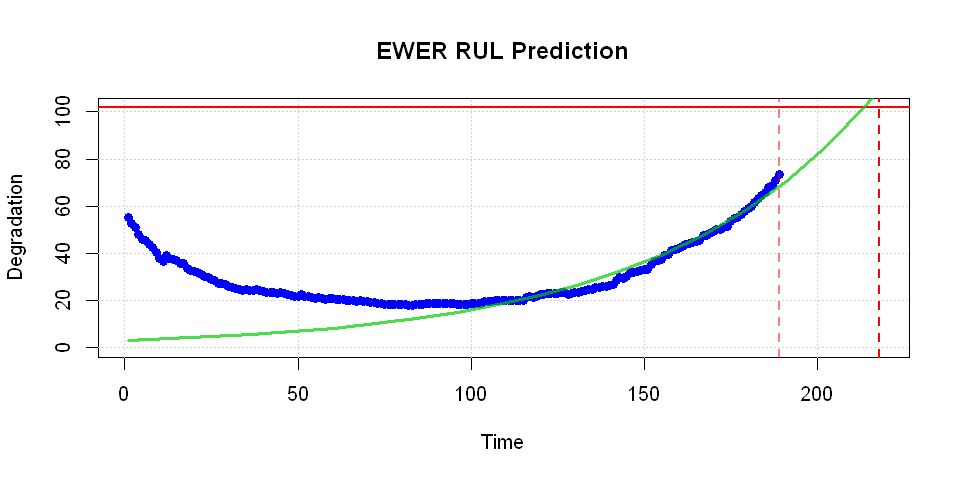

In [319]:
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow=c(1,1))

RS = RULsystem(trainX, trainY, testX, testY, time=c(nrow(testY),nrow(testY)), weight=w, mean_life=mean(trainEoL), alpha=0.05, failure_criteria = PoF, model='WER', plot_type=T, ylim=c(0,PoF), xlim=c(1,testEoL[machineNum]))
abline(v=testEoL[machineNum], col='red', lwd=2, lty=2) # test EoL
title(main= "EWER RUL Prediction") # Exponentially Weighted Exponential Regression
cat(sprintf('Test EoL : %d', testEoL[machineNum]))

## 결론

- <h4> 해당 script는 Correlation의 크기를 활용한 잔여수명 예측 가능 여부 판단을 목표로함 </h4>
- <h4> 이는 Correlation L2-Norm을 Degradation으로 사용할 수 있는지에 대한 실험으로 볼 수 있음 </h4>

- <h4> 본 프로세스는 Raw data -> Correlation Analysis -> Correlation L2-Norm -> PoF based RUL prediction 프로세스를 따름 </h4>
- <h4> PoF는 train 데이터 (Run-to-Failure)에서 추출하여 100대 기계 PoF의 평균을 사용하였음 </h4>
- <h4> 또한 LPoF(μ-3σ), PoF(μ), UPoF(μ+3σ)를 이용해서 저위험, 중위험, 고위험을 나타냈음 </h4>
- <h4> 예측모델은 EWLR(선형), EWPR(다항), EWER(지수) 3가지 모델을 사용하여 성능을 비교하였음</h4>
- <h4> 비선형모델의 경우 데이터의 개수만 적절하게 주어진다면 우수한 성능을 나타낼 것으로 보임</h4>